# **Исследование надежности заемщиков**

<font size = 4> **Описание проекта**
 
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение, уровень дохода, цель займа и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов. 
    
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<font size = 4> **Цель проекта**
 
Нужно ответить на вопросы:
* Есть ли зависимость между количеством детей клиента и возвратом им кредита в срок?
* Есть ли зависимость между семейным положением клиента и возвратом им кредита в срок?
* Есть ли зависимость между уровнем дохода клиента и возвратом им кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

<font size = 4> **План проекта**

1.  Изучение данных  
    1.1  Импортируем библиотеки  
    1.2  Считываем данные из CSV-файла в датафрейм и сохраняем в переменные  
    1.3  Выводим основную информацию о датафреймах методом info  
2.  Предобработка данных  
    2.1  Обработем аномальные значения  
    2.2  Обработаем пропущенные значения  
    2.3  Изменим типы данных   
    2.4  Обработаем дубликаты  
    2.5  Категоризация данных  
3.  Исследование данных и ответы на вопросы:  
    3.1  Есть ли зависимость между количеством детей и возвратом кредита в срок?  
    3.2  Есть ли зависимость между семейным положением и возвратом кредита в срок?  
    3.3  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?  
    3.4  Как разные цели кредита влияют на его возврат в срок?   
4.  Итоговый вывод  

## Изучение данных

### Импортируем библиотеки

In [1]:
# импорт библиотеки pandas
import pandas as pd 

### Считываем данные из CSV-файла в датафрейм и сохраняем в переменные

In [2]:
# чтение файла с данными и сохранение в data
try:
    data = pd.read_csv('d:/Data_science/Projects_jupiter/data/data.csv')
except:
    data = pd.read_csv('/datasets/data.csv')

In [3]:
# получение случайных 10 строк таблицы
data.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
18832,2,-627.085747,28,среднее,1,гражданский брак,1,F,сотрудник,0,75700.220819,недвижимость
10622,0,385664.024835,67,среднее,1,женат / замужем,0,F,пенсионер,0,27776.117526,заняться образованием
2601,0,-879.422273,27,высшее,0,Не женат / не замужем,4,F,сотрудник,0,118850.789141,жилье
18477,0,-1573.326646,25,неоконченное высшее,2,Не женат / не замужем,4,F,компаньон,0,134120.398957,покупка коммерческой недвижимости
3050,2,-1705.181865,40,среднее,1,женат / замужем,0,F,сотрудник,1,83436.807198,получение высшего образования
17806,0,-498.706306,27,среднее,1,женат / замужем,0,M,сотрудник,1,157704.346803,ремонт жилью
12631,0,360640.205004,61,среднее,1,гражданский брак,1,M,пенсионер,0,229471.777989,свадьба
18529,0,-450.954299,25,высшее,0,Не женат / не замужем,4,M,компаньон,0,173665.181241,операции с недвижимостью
3040,0,NaN,49,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,покупка коммерческой недвижимости
2035,1,-4821.651965,45,высшее,0,женат / замужем,0,F,госслужащий,0,181566.431683,покупка жилья для семьи


**Описание данных:**
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

### Выводим основную информацию о датафреймах методом `info` 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод:**  

Итак, в таблице 11 признаков. Тип данных во всех столбцах различается.  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

## Предобработка данных

### Обработем аномальные значения
В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. 

#### Рассмотрим столбец `days_employed`

Отрицательное количество дней трудового стажа в столбце `days_employed` явно аномальное. Заменим все отрицательные значения положительными с помощью метода `abs()`.

In [5]:
# Замена отрицательных значениё положительными
data['days_employed'] = data['days_employed'].abs()

Рассмотрим для каждого типа занятости медианное значение трудового стажа `days_employed` в днях.

In [6]:
# Групировка данных по столбцу "income_type"
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

**Замечание:** 
У двух типов (безработные и пенсионеры) аномально большие значения. Для нашего исследования этот столбец не понадобится, поэтому оставим эти значения.

#### Рассмотрим столбец `children`

In [7]:
# Вывод уникальных значений
print('Уникальные значения столбца "children":', list(data['children'].unique()))
# Подсчёт строк с аномальными значениями "-1" и "20"
print('Количество строк с аномальным количеством детей:', len(data[(data['children'] == -1) | (data['children'] == 20)]))

Уникальные значения столбца "children": [1, 0, 3, 2, -1, 4, 20, 5]
Количество строк с аномальным количеством детей: 123


**Замечание:** В столбце `children` есть два аномальных значения "-1" и "20". Всего в таблице 123 такие строки, что не очень много, поэтому удалим эти данные.

In [8]:
# Удаление аномальных данных
data = data[(data['children'] != -1) & (data['children'] != 20)]
print('Уникальные значения столбца "children":', list(data['children'].unique()))

Уникальные значения столбца "children": [1, 0, 3, 2, 4, 5]


### Обработаем пропущенные значения

In [9]:
# Вывод количества пропущенных значений
data.isna().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2162
purpose                0
dtype: int64

**Замечание:** В столбцах `days_employed` и `total_income` есть пропущенные значения. Для заполнения этих значений лучше попытаться выяснить информацию у заказчика.

Столбец `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости. В рамках задачи исследования, заполнить пропуски в этом столбце можно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

Для нашего исследование столбец `days_employed` не важен, поэтому, для удобства, заполним пропуски в нём по такому же принципу (медианой).

In [10]:
# Заполнение пропущенных значений столбца "total_income"
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()
# Заполнение пропущенных значений столбца "days_employed"
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()
# Вывод количества пропущенных значений 
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменим тип данных в столбцах `total_income` и 	`days_employed`.
Для удобства работы избавимся от дробных значений в столбцах.

In [11]:
# Замена вещественного типа данных на целочисленный
data['total_income'] = data['total_income'].astype(int)
data['days_employed'] = data['total_income'].astype(int)

### Обработаем дубликаты

#### Обработаем неявные дубликаты
Рассмотрим колонку `education`. Здесь есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведём их к нижнему регистру.

In [12]:
# Перевод значений в нижний регистр
data['education'] = data['education'].str.lower()
# Вывод уникальных значений
print(data['education'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


#### Обработаем явные дубликаты

In [13]:
# Вывод количества дубликатов
print('Было дубликатов:', data.duplicated().sum())
# Удаление дубликатов
data = data.drop_duplicates()
# Вывод количества дубликатов
print('Стало дубликатов:', data.duplicated().sum())

Было дубликатов: 72
Стало дубликатов: 0


### Категоризация данных

#### Создадим столбец `total_income_category`, на основании диапазонов значений столбца `total_income`, c категориями:

* `А`- 1000001 и выше,  
* `B`- 200001–1000000,  
* `C`- 50001–200000,  
* `D`- 30001–50000,  
* `E`- 0–30000.  

Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. 

In [14]:
# Создание функции для определения категории клиента по сумме его общего дохода 
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [15]:
# Создание столбца с категориями клиента по сумме его общего дохода
data['total_income_category'] = data['total_income'].apply(categorize_income)

#### Создадим столбец `purpose_category`, на основании данных из столбца `purpose`, c категориями:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.

In [16]:
# Вывод уникальных значений столбца "purpose"
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [17]:
# Создание функции для определения категории целей взятия кредита
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [18]:
# Создание столбца с категориями целей взятия кредита 
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

**Вывод:**  

Мы обработали аномальные значения в столбцах `daya_employed` и `children`, некоторые из которых удалили, и изменили типы данных в столбце `total_income`.  
Пропущенные значения в столбцах `total_income` и `days_employed` заменили "медианами".  
Также мы обработали неявные дубликаты и удалили явные.  
В конце мы создали два категориальных столбца `total_income_category` и `purpose_category`.  

**Так как в наших данных довольно много пропусков (около 10 %) и результаты исследования будут учитываться при построении модели кредитного скоринга, то следует заметить, что следует более внимательно отнестись к природе появления пропусков в данных, а также способу их заполнения.**

**Возможные причины появления пропусков в исходных данных:**
* Пропуск в данных может не являться пропуском как таковым. Это может быть нулевое значение (например, ноль дней стажа, если человек еще не работал официально). 
* Неуказанные данные не предоставлены пользователем / заявителем и т.д.
* Причиной появления пропусков может быть сбой.

В данном проекте в исходных данных были пропуски в двух столбцах `days_employed` и `total_income`. Эти данные количественные. Мы считаем что пропуски возникли вследствие человеческого фактора. Люди часто не охотно раскрывают данные по своему доходу (здесь это столбец `total_income`). Тоже самое может относиьтся и к столбцу `days_employed` (опыт работы в днях). Возможно, также, что эти данные были не обязательны к заполнению или же утеряны в процессе заполнения.

В количественных переменных возможны большие разбросы данных (могут быть выбросы, т.е. слишком большие или маленькие значения). Например одно значение может сильно выбиваться из всего датасета и сильно влиять на среднее значение. А вот на медиану это влияние будет заметно меньше. Следовательно заполнение медианой пропущенных количественных значений будет более обьективным, чем, например, средним значением.

Однако, всё же, при заполнении медианой возможно сильное искажение реального дохода клиента. Эта ситуация скорее всего повлияет на принятие решения о выдаче ему кредита. Поэтому нужно постараться выяснить его реальный доход, или, возможно, исключить эти данные при работе над построением модели кредитного скоринга.


## Исследование данных

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

,mean,count
children,,
0,0.075444,14090
1,0.092346,4808
2,0.094542,2052
3,0.081818,330
4,0.097561,41
5,0.000000,9


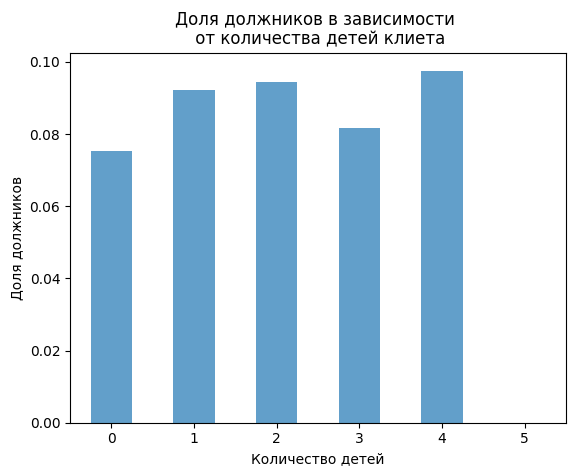

In [19]:
# Группировка по количеству детей, вывод доли должников и общего числа клиентов в категории
display(data.groupby('children')['debt'].agg(['mean','count']))
# Построение графика на основе сгруппированных данных
(data.groupby('children')['debt'].agg('mean')
                                 .plot.bar(alpha=0.7, rot=0, xlabel='Количество детей', ylabel='Доля должников')
                                 .set_title('Доля должников в зависимости \n от количества детей клиета'));


**Вывод:**  

Для ответа на этот вопрос мы сгрупировали данные из столбца `debt` (здесь указано является ли человек должником) по количеству детей заемщика. В стобце `mean` мы видим процент должников. В столбце `count` общее количество людей относящихся к данной категории. 

В сводной таблице видно что количество информации по категориям: 3,4,5 существенно меньше чем о людях из первых трех категорий. Для ответа на поставленный вопрос будем анализировать первые три группы (0,1,2).
Для анализа и наглядности мы построили столбчатый график.
На графике видно что процент должников в группе растет с количеством детей в семье. 

**Значит зависимость между количеством детей и возвратом кредита в срок существует.**

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

,mean,count
family_status,,
Не женат / не замужем,0.097639,2796
в разводе,0.070648,1189
вдовец / вдова,0.066246,951
гражданский брак,0.093130,4134
женат / замужем,0.075612,12260


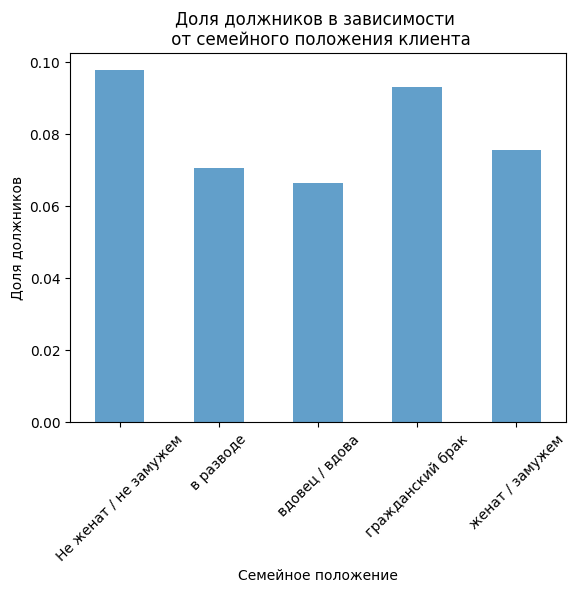

In [20]:
# Группировка по семейному положению, вывод доли должников и общего числа клиентов в категории
display(data.groupby('family_status')['debt'].agg(['mean','count']))
# Построение графика на основе сгруппированных данных
(data.groupby('family_status')['debt'].agg('mean')
                                      .plot.bar(alpha=0.7, rot=45, xlabel='Семейное положение', ylabel='Доля должников')
                                      .set_title('Доля должников в зависимости \n от семейного положения клиента'));


**Вывод:**

Для ответа на этот вопрос мы сгрупировали данные из столбца `debt` (здесь указано является ли человек должником) по семейному положению заемщика. В стобце `mean` мы видим процент должников. В столбце `count` общее количество людей относящихся к данной категории.

Для анализа и наглядности мы построили столбчатый график.
На графике видно, что процент должников заметно ниже в категориях: "в разводе", "вдовец/вдова" и "женат/замужем". В остальных категориях "Не женат/ не замужем" и "гражданский брак" процент должников выше. Заметим также, что процент должников среди людей, когда-либо закреплявших свой брак юридически ниже, чем среди людей никогда не закреплявших отношения. 

**Следовательно существует зависимость между семейным положением и возвратом кредита в срок.**

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Напомним разбивку на категории по диапазону значений общего дохода:   
* `А`- 1000001 и выше,  
* `B`- 200001–1000000,  
* `C`- 50001–200000,  
* `D`- 30001–50000,  
* `E`- 0–30000.  

,mean,count
total_income_category,,
A,0.080000,25
B,0.070602,5014
C,0.084987,15920
D,0.060172,349
E,0.090909,22


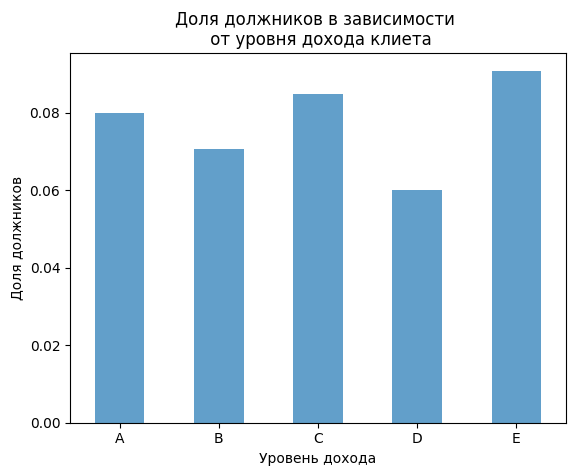

In [21]:
# Группировка по уровню дохода, вывод доли должников и общего числа клиентов в категории
display(data.groupby('total_income_category')['debt'].agg(['mean','count']))
# Построение графика на основе сгруппированных данных
(data.groupby('total_income_category')['debt'].agg('mean')
                                              .plot.bar(alpha=0.7,rot=0, xlabel='Уровень дохода', ylabel='Доля должников')
                                              .set_title('Доля должников в зависимости \n от уровня дохода клиета'));


**Замечание:**

Для ответа на этот вопрос мы сгрупировали данные из столбца `debt` (здесь указано является ли человек должником) по уровню дохода заемщика. В стобце `mean` мы видим процент должников. В столбце `count` общее количество людей относящихся к данной категории.

Для анализа и наглядности мы построили столбчатый график.
Здесь не видно зависимости способности возвращать кредит в срок от уровня дохода человека. Но в сводной таблице мы видим, что большинство записей сосредоточенно в группе С (и в группе B). Возможно мы не правильно разбили данные по категориям. 

Воспользуемся методом qcut() и постараемся разбить столбец `total_income` на категории с равным количеством записей в каждой.

,mean,count
qcut_total_income,,
"(20000.0, 65000.0]",0.066542,1067
"(65000.0, 79000.0]",0.080675,1066
"(79000.0, 89000.0]",0.084349,1067
"(89000.0, 99000.0]",0.090909,1067
"(99000.0, 108000.0]",0.077861,1066
"(108000.0, 116000.0]",0.089035,1067
"(116000.0, 123000.0]",0.086304,1066
"(123000.0, 132000.0]",0.082552,1066
"(132000.0, 142000.0]",0.089035,1067


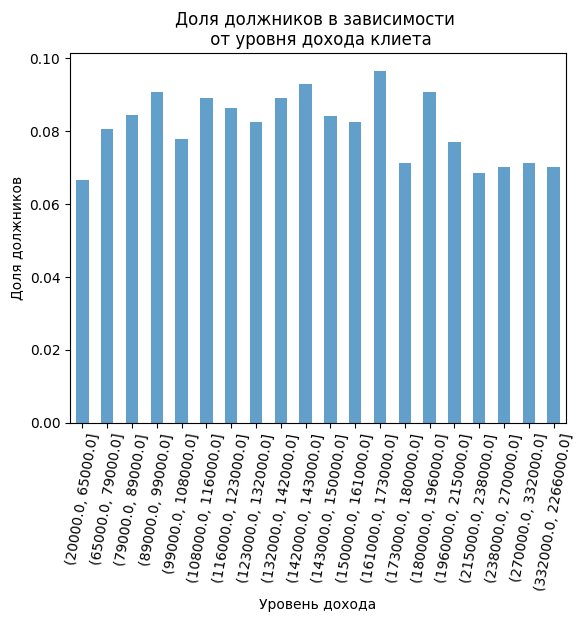

In [22]:
# Разбивка данных столбца "total_income" на категории с помощью метода qqut()
data['qcut_total_income'] = pd.qcut(data['total_income'], 20, precision=-100)
# Группировка по уровню дохода, вывод доли должников и общего числа клиентов в категории
display(data.groupby('qcut_total_income')['debt'].agg(['mean', 'count']))
# Построение графика на основе сгруппированных данных
(data.groupby('qcut_total_income')['debt'].mean()
                                          .plot.bar(alpha=0.7,rot=80, xlabel='Уровень дохода', ylabel='Доля должников')
                                          .set_title('Доля должников в зависимости \n от уровня дохода клиета'));

**Вывод:**

У нас получилось разбить наш столбец `total_income` на 20 примерно равных групп. Но и в этом случае мы не видим связи между доходом человека и его способностью погашать кредит в срок. Возможно на это повлияли изначальные пропуски в данных этого столбца. Но скорее всего это влияние не значительно. 

**На основании проведенного анализа мы делаем заключение: зависимости между уровнем дохода человека и возвратом кредита в срок нет.**

### Как разные цели кредита влияют на его возврат в срок?

,mean,count
purpose_category,,
операции с автомобилем,0.093480,4279
операции с недвижимостью,0.072558,10750
получение образования,0.092528,3988
проведение свадьбы,0.079118,2313


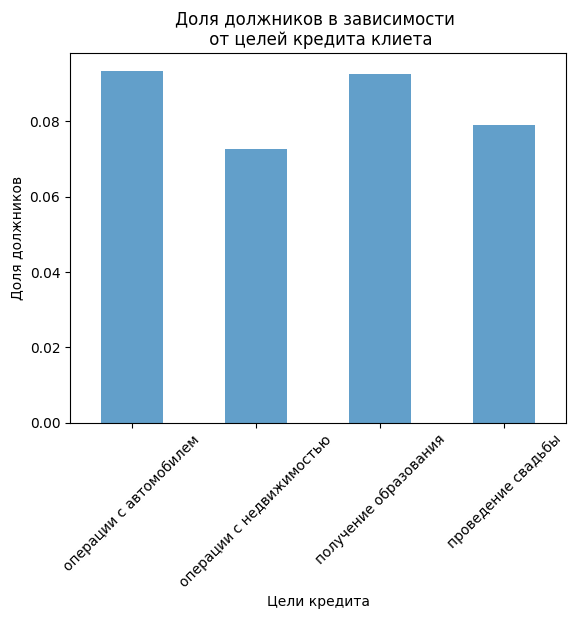

In [23]:
# Группировка по целям кредита, вывод доли должников и общего числа клиентов в категории
display(data.groupby('purpose_category')['debt'].agg(['mean','count']))
# Построение графика на основе сгруппированных данных
(data.groupby('purpose_category')['debt'].agg('mean')
                                         .plot.bar(alpha=0.7,rot=45, xlabel='Цели кредита', ylabel='Доля должников')
                                         .set_title('Доля должников в зависимости \n от целей кредита клиета'));

**Вывод:**  Для ответа на этот вопрос мы сгрупировали данные из столбца `debt` (здесь указано является ли человек должником) по целям кредита. В стобце `mean` мы видим процент должников. В столбце `count` общее количество людей относящихся к данной категории.

Для анализа и наглядности мы построили столбчатый график. На графике видно, что процент должников заметно ниже в категориях: "операции с недвижимостью" и "проведение свадьбы". В остальных категориях "операции с автомобилем" и "получение образования" процент должников выше. 

**Следовательно цели кредита влияют на его возврат в срок.**

## Итоговый вывод

В данном проекте мы исследовали статиститку банка о платежеспособности клиентов.

**В первой части проекта мы изучили данные.**

**Во второй части проекта мы выполнили предобработку данных:**
* обработали аномальные значения (заменили отрицательные значения положительными и удалили строки с аномальными значенияим)
* заполнили пропуски в количественных переменных медианными значениями
* изменили тип данных там, где это нужно
* обработали дубликаты и удалили строки, являющиеся полными дубликатами
* разбили данные в столбцах (там, где это поможет анализу) на категории

**В третьей части  проекта мы проверили четыре гипотезы и установили:**

1. Существует зависимость между количеством детей клиента и его способностью возвращать деньги в срок. 
2. На погашение кредита в срок оказывает влияние семейное положение человека. 
3. Мы не нашли зависимости между уровнем дохода клиента и возвратом кредита им в срок. 
4. Цели взятия кредита влияют на возврат денег в срок. 